In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
  
pd.set_option('display.float_format', lambda x : '%.2f'%x)

# read dataset
iris = fetch_ucirepo(id=53) 
   
data = iris.data.features 
target = iris.data.targets  

print(data)

     sepal length  sepal width  petal length  petal width
0            5.10         3.50          1.40         0.20
1            4.90         3.00          1.40         0.20
2            4.70         3.20          1.30         0.20
3            4.60         3.10          1.50         0.20
4            5.00         3.60          1.40         0.20
..            ...          ...           ...          ...
145          6.70         3.00          5.20         2.30
146          6.30         2.50          5.00         1.90
147          6.50         3.00          5.20         2.00
148          6.20         3.40          5.40         2.30
149          5.90         3.00          5.10         1.80

[150 rows x 4 columns]


In [2]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pd.DataFrame(data_scaled).head

<bound method NDFrame.head of         0     1     2     3
0   -0.90  1.03 -1.34 -1.31
1   -1.14 -0.12 -1.34 -1.31
2   -1.39  0.34 -1.40 -1.31
3   -1.51  0.11 -1.28 -1.31
4   -1.02  1.26 -1.34 -1.31
..    ...   ...   ...   ...
145  1.04 -0.12  0.82  1.45
146  0.55 -1.28  0.71  0.92
147  0.80 -0.12  0.82  1.05
148  0.43  0.80  0.93  1.45
149  0.07 -0.12  0.76  0.79

[150 rows x 4 columns]>

In [3]:
#kmeans clustering
n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)

#Mapping kmeans labels to actual name
cluster_labels = kmeans.labels_


index_to_name = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

pred = [index_to_name[cluster] for cluster in cluster_labels]

temp = pd.DataFrame({'Target': np.squeeze(target), 'K-Means': pred})
temp

C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Target,K-Means
0,Iris-setosa,versicolor
1,Iris-setosa,versicolor
2,Iris-setosa,versicolor
3,Iris-setosa,versicolor
4,Iris-setosa,versicolor
...,...,...
145,Iris-virginica,virginica
146,Iris-virginica,setosa
147,Iris-virginica,virginica
148,Iris-virginica,virginica


In [4]:
#ARI to compare actual target and k means 

ari = adjusted_rand_score(np.squeeze(target), cluster_labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.6201351808870379


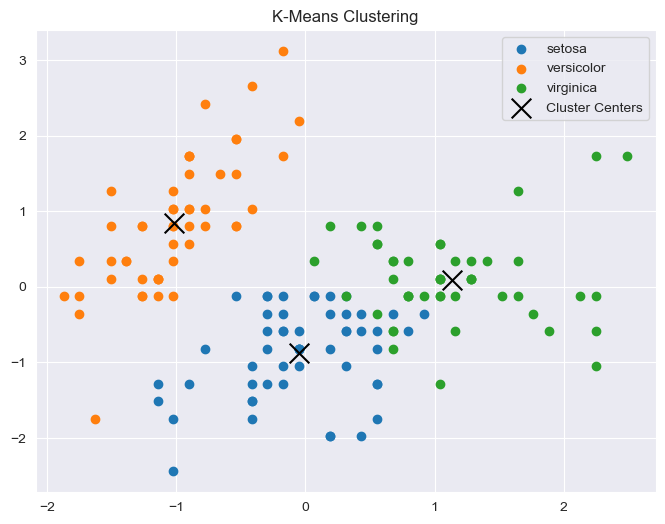

In [5]:
# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot each class separately
for cluster_id, class_name in index_to_name.items():
    cluster_data = data_scaled[cluster_labels == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=class_name)

# Plot cluster centers
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='black', label='Cluster Centers')

plt.title('K-Means Clustering')
plt.legend()
plt.show()

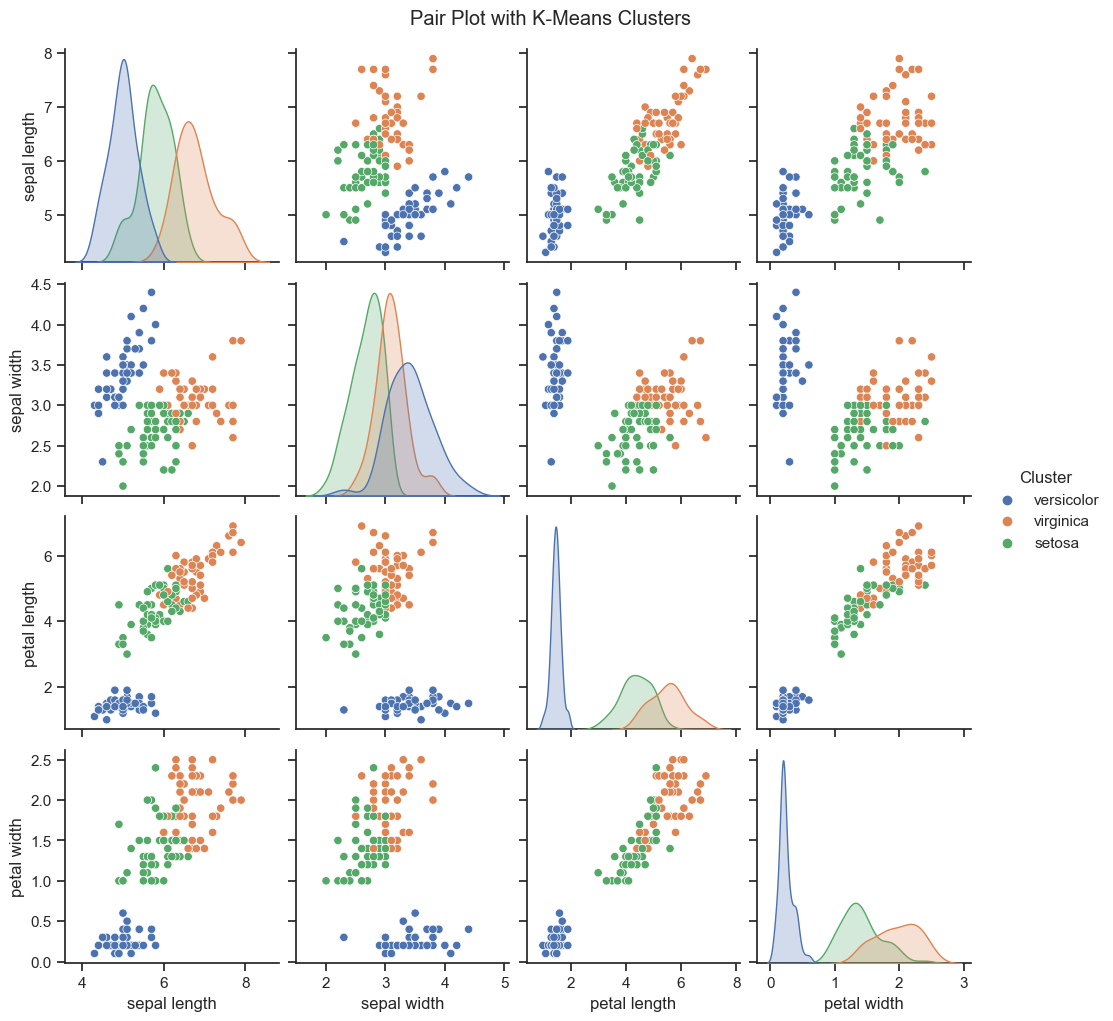

In [9]:
# Create a pair plot including the cluster assignments
df_pairplot = pd.DataFrame(data, columns=iris.data.feature_names)
df_pairplot['Cluster'] = pred  # Add cluster assignments as a new column

# Use Seaborn to create a pair plot
sns.set(style="ticks")
sns.pairplot(df_pairplot, hue="Cluster")
plt.suptitle("Pair Plot with K-Means Clusters", y=1.02)
plt.show()  # Display the pair plot